In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('d:/dataset/goldprice/Gold_Price_Train.csv')
dataset_train.tail()

,Date,Open,Close,Silver Fix
3002,20/12/2019,1476.90,1479.00,17.035
3003,23/12/2019,1483.95,1482.10,17.375
3004,27/12/2019,1510.60,1511.50,17.825
3005,30/12/2019,1511.50,1514.75,17.825
3006,31/12/2019,1523.00,1514.75,18.045


In [3]:
training_set = dataset_train.iloc[:,1:2].values

In [4]:
type(training_set)

numpy.ndarray

In [5]:
training_set.shape

(3007, 1)

In [6]:
# Scaling  ; mMinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [7]:
sc = MinMaxScaler(feature_range=(0,1))

training_set_scaled = sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[0.12313123],
       [0.14356312],
       [0.1380814 ],
       ...,
       [0.67948505],
       [0.68023256],
       [0.68978405]])

In [9]:
len(training_set)

3007

In [10]:
X_train = []
y_train =[]
for i in range(60,3007):
    X_train.append(training_set_scaled[i-60:i,0]) 
# values from 0 to 60
    y_train.append(training_set_scaled[i,0]) # 60th
    
#X_train; 0-59, 1-60, 2-61, 3-63 ...  days
#y_train;  60,   61,   62,   63   ...

In [11]:
type(X_train)

list

In [12]:
# convert into numpy array
X_train,y_train = np.array(X_train),np.array(y_train)

In [13]:
type(X_train)

numpy.ndarray

In [14]:
#shape
X_train.shape   # 0,59 :1,60: 2:61, 3:62

(2947, 60)

In [15]:
y_train.shape    #60:61:62,

(2947,)

In [16]:
len(X_train[3])

60

In [17]:
y_train[0]

0.20328073089700993

In [18]:
dataset_train['Open'].iloc[60]

937.25

In [19]:
# Reshaping
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [20]:
X_train.shape

(2947, 60, 1)

# # Part2;  Building and Training the RNN/LSTM

In [21]:
# import the keras library and pakcages

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import LSTM #  VS GRU (gated Recurrent Unit)

# Gates: input, output, forget
from keras.layers import Dropout  # To avoid overfitting

Using TensorFlow backend.


In [22]:
# Initialize the LSTM 

# Regression problem because our Target Variable is Continunous Variable

price_regress = Sequential()

In [23]:
# Adding the Layers
# input layer + first LSTM hidden layer
price_regress.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
price_regress.add(Dropout(0.2)) # some dropout regulirization

In [24]:
# add second LSTM with some dropout reg.

price_regress.add(LSTM(units = 50, return_sequences = True)) # input_shape = (X_train.shape[1], 1)))
price_regress.add(Dropout(0.2))

In [25]:
# add Third LSTM
price_regress.add(LSTM(units=50, return_sequences=True))
price_regress.add(Dropout(0.2)) # some dropout regulirization

# fourth LSTM layer
price_regress.add(LSTM(units=50))
price_regress.add(Dropout(0.2)) # some dropout regulirization

# last layer: output layer

price_regress.add(Dense(units=1))

In [26]:
# Compile the LSTM network
price_regress.compile(optimizer='adam',loss='mean_squared_error')

# Train the model; fit

price_regress.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
2947/2947 [==============================] - 23s 8ms/step - loss: 0.0177
Epoch 2/50
2947/2947 [==============================] - 16s 5ms/step - loss: 0.0042
Epoch 3/50
2947/2947 [==============================] - 16s 5ms/step - loss: 0.0035
Epoch 4/50
2947/2947 [==============================] - 17s 6ms/step - loss: 0.0033
Epoch 5/50
2947/2947 [==============================] - 20s 7ms/step - loss: 0.0031
Epoch 6/50
2947/2947 [==============================] - 19s 6ms/step - loss: 0.0030
Epoch 7/50
2947/2947 [==============================] - 16s 5ms/step - loss: 0.0028
Epoch 8/50
2947/2947 [==============================] - 16s 5ms/step - loss: 0.0026
Epoch 9/50
2947/2947 [==============================] - 16s 5ms/step - loss: 0.0028
Epoch 10/50
2947/2947 [==============================] - 19s 6ms/step - loss: 0.0026
Epoch 11/50
2947/2947 [==============================] - 69s 24ms/step - loss: 0.0024
Epoch 12/50
2947/2947 [==============================] - 20s 7ms/step - l

In [27]:
# Part 3:  Making the Predictions and Visualizing the results
# Getting the real gold price

dataset_test = pd.read_csv('d:/dataset/goldprice/Gold_Price_Test.csv')
dataset_test.head()

,Date,Open,Close,Silver Fix
0,02/01/2020,1520.55,1527.10,17.925
1,03/01/2020,1547.40,1548.75,18.210
2,06/01/2020,1576.85,1573.10,18.440
3,07/01/2020,1566.50,1567.85,18.145
4,08/01/2020,1582.85,1571.95,18.420


In [28]:
!cd

C:\Users\abdul


In [29]:
real_gold_price = dataset_test.iloc[:,1:2].values

In [30]:
## getting the predicted gold price 

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [31]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [32]:
 len(dataset_total)

3109

In [33]:
inputs

array([1509.5 , 1502.15, 1500.  , 1503.4 , 1508.2 , 1498.35, 1494.2 ,
       1494.75, 1482.55, 1484.45, 1487.5 , 1490.85, 1487.45, 1494.25,
       1488.85, 1504.65, 1505.05, 1492.75, 1490.15, 1506.4 , 1509.85,
       1509.2 , 1504.6 , 1488.55, 1484.1 , 1466.85, 1465.5 , 1455.  ,
       1463.45, 1467.65, 1465.6 , 1458.4 , 1464.9 , 1475.7 , 1468.9 ,
       1471.3 , 1459.45, 1457.65, 1459.8 , 1457.55, 1456.35, 1457.5 ,
       1470.4 , 1475.85, 1474.6 , 1474.85, 1463.6 , 1464.45, 1468.05,
       1474.7 , 1470.6 , 1477.4 , 1478.4 , 1478.9 , 1474.4 , 1476.9 ,
       1483.95, 1510.6 , 1511.5 , 1523.  , 1520.55, 1547.4 , 1576.85,
       1566.5 , 1582.85, 1547.85, 1548.8 , 1550.35, 1544.95, 1551.9 ,
       1555.2 , 1556.5 , 1559.25, 1556.25, 1558.1 , 1554.05, 1561.85,
       1583.45, 1579.6 , 1571.2 , 1580.4 , 1580.85, 1578.85, 1571.2 ,
       1552.2 , 1564.75, 1568.3 , 1574.05, 1567.7 , 1566.75, 1575.  ,
       1576.35, 1580.3 , 1588.2 , 1609.5 , 1610.35, 1633.7 , 1682.35,
       1655.9 , 1647

In [34]:
inputs = inputs.reshape(-1,1)

In [35]:
inputs = sc.transform(inputs)

In [36]:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])

In [37]:
X_test

[array([0.67857143, 0.67246678, 0.67068106, 0.67350498, 0.67749169,
        0.66931063, 0.66586379, 0.6663206 , 0.65618771, 0.65776578,
        0.660299  , 0.6630814 , 0.66025748, 0.66590532, 0.66142027,
        0.67454319, 0.67487542, 0.66465947, 0.6625    , 0.67599668,
        0.67886213, 0.67832226, 0.67450166, 0.6611711 , 0.65747508,
        0.64314784, 0.64202658, 0.63330565, 0.64032392, 0.64381229,
        0.64210963, 0.63612957, 0.64152824, 0.65049834, 0.6448505 ,
        0.64684385, 0.63700166, 0.63550664, 0.63729236, 0.63542359,
        0.63442691, 0.63538206, 0.64609635, 0.65062292, 0.64958472,
        0.64979236, 0.6404485 , 0.64115449, 0.64414452, 0.64966777,
        0.64626246, 0.6519103 , 0.65274086, 0.65315615, 0.6494186 ,
        0.65149502, 0.6573505 , 0.67948505, 0.68023256, 0.68978405]),
 array([0.67246678, 0.67068106, 0.67350498, 0.67749169, 0.66931063,
        0.66586379, 0.6663206 , 0.65618771, 0.65776578, 0.660299  ,
        0.6630814 , 0.66025748, 0.66590532, 0.

In [38]:
X_test = np.array(X_test)

In [39]:
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [40]:
predicted_gold_price = price_regress.predict(X_test)

In [41]:
predicted_gold_price

array([[0.6882257 ],
       [0.6947249 ],
       [0.702201  ],
       [0.7149981 ],
       [0.7261982 ],
       [0.7351699 ],
       [0.73407304],
       [0.72667515],
       [0.7193799 ],
       [0.7145368 ],
       [0.71408075],
       [0.7171779 ],
       [0.721418  ],
       [0.7251805 ],
       [0.72683275],
       [0.7269597 ],
       [0.7256375 ],
       [0.7253891 ],
       [0.7304905 ],
       [0.737229  ]], dtype=float32)

In [42]:
predicted_gold_price = sc.inverse_transform(predicted_gold_price)

In [43]:
len(predicted_gold_price)

20

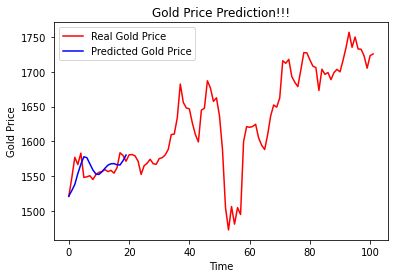

In [44]:
#visualization; line plot

plt.plot (real_gold_price,color='red',label='Real Gold Price')
plt.plot (predicted_gold_price,color='blue',label='Predicted Gold Price')

plt.title('Gold Price Prediction!!!')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [45]:
dataset_total.to_csv('Gold_Price_Full.csv')

In [46]:
df1 = pd.read_csv('d:/dataset/goldprice/Gold_Price_Train.csv')
df2 = pd.read_csv('d:/dataset/goldprice/Gold_Price_Test.csv')

df3 = pd.concat([df1,df2],ignore_index=True)

In [47]:
df3.to_csv('Gold_Price_All.csv')

In [48]:
df3.tail()

,Date,Open,Close,Silver Fix
3104,22/05/2020,1732.45,1733.55,17.00
3105,26/05/2020,1722.75,1720.25,17.30
3106,27/05/2020,1705.15,1694.60,17.19
3107,28/05/2020,1723.30,1717.35,17.34
3108,29/05/2020,1725.65,1728.70,17.59
